# Introduction

Many of us have reconsidered the time we spend on social media, and others have even decided to take a small break. People have breaks from social media for various reasons, such as preparing for a major life event or concerns about their social media consumption. In this study, we analyzed Twitter data to understand how people frame their breaks.

Some of the terms used to describe a time off social media have various origins. Sabbath and fasting have religious roots. Others such as detox is commonly used in the health context. And unplugging and disconnecting are usually used when we’re talking about electronics. It is interesting to note that most of the words describing taking a break from social media indicate that being connected is the normal state.

# Data Collection

We started our Twitter data collection using 40 hashtags related to disconnecting from social media. Our first dataset showed that average users don’t frequently use hashtags. Therefore, we used the terms without the hashtag symbol.The dataset also revealed more frequent terms that were added to the finalized search words list, such as, Mental health and scroll.

Our final dataset consists of 3565 English tweets using 20 search terms that were defined with the preliminary analysis.
we used the following hashtags to collect that data.

Unplugging | Digital detox | Mental health | Social media fast | Social media sabbath | Digital detox | Screen time | Time off | Break from social media | Social media addiction | Phone addiction | Disconnect social media | Social media break | Social media attachment  | Attention economy | Digital detoxing | Social media wellness | Social media mindfulness | Digital minimalism | Social media scroll

The data is collected using the file `tweepy-function.ipynb` which is included in this repo. credits to [
Griffin Leow](https://python.plainenglish.io/scraping-tweets-with-tweepy-python-59413046e788)

# Data Preperation

In [2]:
import pandas as pd
import numpy as np

In [15]:
tweets = pd.read_csv("data/tweets_20210422.csv")

tweets = tweets.drop_duplicates()
tweets = tweets.reset_index(drop=True)

tweets = tweets["tweet"]

In [16]:
tweets.head()

0    @supermintendo Unplugging yourself from social...
1    Politics are a chronic medical conditions that...
2    On the topic of unplugging from social media, ...
3    Feel like unplugging 🔌 from social media today...
4    We are all collectively tired.\n\nGrieving our...
Name: tweet, dtype: object

In [17]:
print("Tweets count: " + str(len(tweets)))

Tweets count: 3565


# EDA

Checking the fequency of the search terms in the dataset

In [88]:
key_words = {
    "unplugging social media" : len(tweets[tweets.str.contains('(?=.*unplugging)(?=.*social media)')]),
    "digital detox social media" : len(tweets[tweets.str.contains('(?=.*digital)(?=.*detox)(?=.*social media)')]),
    "mental health social media" : len(tweets[tweets.str.contains('(?=.*mental)(?=.*health)(?=.*social media)')]),
    "social media fast" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*fast)')]),
    "social media_sabbath" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*sabbath)')]),
    "digital detox" : len(tweets[tweets.str.contains('(?=.*digital detox)')]),
    "screen time social media" : len(tweets[tweets.str.contains('(?=.*screen time)(?=.*social media)')]),
    "time off social media" : len(tweets[tweets.str.contains('(?=.*time off)(?=.*social media)')]),
    "break from social media" : len(tweets[tweets.str.contains('(?=.*break from)(?=.*social media)')]),
    "social media addiction" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*addiction)')]),
    "phone addiction" : len(tweets[tweets.str.contains('(?=.*phone)(?=.*addiction)')]),
    "disconnect social media" : len(tweets[tweets.str.contains('(?=.*disconnect)(?=.*social media)')]),
    "social media break" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*break)')]),
    "social media attachment" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*attachment)')]),
    "attention economy" : len(tweets[tweets.str.contains('(?=.*attention)(?=.*economy)')]),
    "digital detoxing" : len(tweets[tweets.str.contains('(?=.*digital)(?=.*detoxing)')]),
    "social media wellness" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*wellness)')]),
    "social media mindfulness" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*mindfulness)')]),
    "digital minimalism social media" : len(tweets[tweets.str.contains('(?=.*digtial)(?=.*minimalism)(?=.*social media)')]),
    "social media scroll" : len(tweets[tweets.str.contains('(?=.*social media)(?=.*scroll)')])
}

[Text(0.5, 0, 'key terms'), Text(0, 0.5, 'tweet count')]

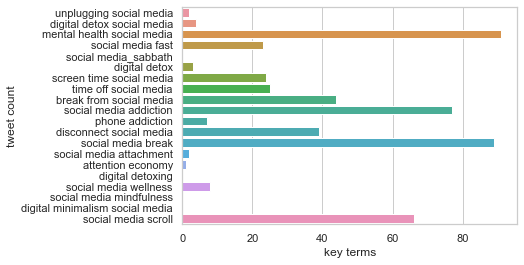

In [109]:
import seaborn as sns
sns.set_theme(style="whitegrid")
my_df = pd.DataFrame(key_words.items())
ax = sns.barplot(x=1, y=0, data=my_df)
ax.set(xlabel='key terms', ylabel='tweet count')

# Data Analysis: Summarization

We used summarization to get more representative tweets. In our study, representative tweets are the tweets that talk about a person’s relationship with social media. We summarized the tweets using TF-IDF, which stands for “Term Frequency — Inverse Document Frequency.” This is a method that calculates the importance of one single document in a set of documents by measuring the importance of words in that document. The documents in this scenario are the tweets. The importance of a word is calculated by weighting its occurrence.

We applied this approach to retrieve the 500 hundred tweets with the highest TF-IDF scores to get more representative tweets. Please know that the number 500 is arbitrary.


In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from heapq import nlargest 
from string import punctuation
import collections
import re


def remove_urls(text):
    return re.sub(r'http\S+','', text)

def summarize(tweets, n):
    
    tweets = tweets.apply(remove_urls)
    text = ' '.join(tweets)
    bag_of_words = word_tokenize(text.lower())
    _stopwords = set(stopwords.words('english') + list(punctuation))

    bag_of_words = [word for word in bag_of_words if word not in _stopwords] #stripping stopwords
    freq = FreqDist(bag_of_words) #all the non-stopwords
    ranking = collections.defaultdict(int) #to avoid KeyError

    for i, sent in enumerate(tweets): # loop through the reviews we have
        for w in word_tokenize(sent.lower()): # loop through the words in the reviews
            if w in freq: # if the word in our frquenct object
                ranking[i] += freq[w] # add the rank if the word to the review

    tweets_idx = nlargest(n, ranking, key=ranking.get) # get the n reviews with the highest ranking
    return [tweets[j] for j in sorted(tweets_idx)]

In [32]:
lst = summarize(tweets, 500)
tweets = pd.Series(lst)

In [33]:
tweets.sample(5)

277                                                                 As previously discussed with @meelkiwei, I decided to make a short literature review on social media addiction. My premise:\n\n"Social media addiction resembles internet gaming addiction, which in turn is akin to gambling disorder."
144                                                                                                                   Has #COVID19 increased your screen time?  Nearly 95% of 15 year-olds look at social media daily. 📱 Learn how you can help your teens well-being by limiting their social media usage. 
56                                                    I’m taking a break from social media today, my mental health isn’t too great. I appreciate y’all’s support💫If you can boost this post it would help so so much to find potential customers✨My commissions are open and my shops still have listings 🖤 
274    @business @google @Facebook and other “social” media companies need to be put in check. Th

Before using summarization, we manually labeled a random sample of tweets by going through all the tweets and labeling them with relevant in case the tweet is talking about someone’s relationship with social media and irrelevant in case it was talking about any other topic.

The percentage of the relevant tweets in the random sample was around 54%.
After summarizing the tweets and labeling a random sample, this number increased to almost 63%.

Summarization returned tweets that are more relevant to social media. This approach increased the relevance by 8.62%, and it also returned significantly fewer abstract tweets.


# Data Analysis: n-grams

Bigrams are two words that are frequently used together—for example, social media. Bigrams help to identify words that are frequently occurring together.

In [60]:
import nltk
import unicodedata

def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    ADDITIONAL_STOPWORDS = ["nnrun","nntrust","im"]
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    text=' '.join(words).lower()
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    
    return [word for word in words if word not in stopwords]

In [61]:
words = basic_clean(''.join(str(tweets.tolist())))

In [62]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

[Text(0.5, 0, 'tweet count'), Text(0, 0.5, 'bi-gram')]

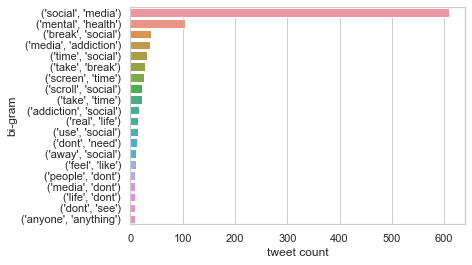

In [108]:
sns.set_theme(style="whitegrid")
my_df = pd.DataFrame(bigrams_series.items())
ax = sns.barplot(x=1, y=0, data=my_df)
ax.set(xlabel='tweet count', ylabel='bi-gram')

The chart shows the most frequent n-grams and indicates that some terms are significantly more frequent than others. It is not a surprise to find social media at the top of the list since it's mentioned in most key terms.

# Data Analysis: Word Cloud

Our following approach is word clouds. We use word clouds to show the most frequent words in the dataset.
Word clouds disregard stop words such as pronouns and conjunctions.
Looking at this word cloud, we can see that the bigger words are mostly related to health, such as mental and addiction. And others related to duration, such as time and break.
This method provides a good visualization of the most frequent terms, and it can give a good idea about the recurring topics in the dataset.

In [64]:
from gensim.corpora import Dictionary
from nltk.probability import FreqDist

word_freq = FreqDist(words)

# retrieve word and count from FreqDist tuples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

# create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

In [65]:
#create mask for the word cloud
from PIL import Image
mask = np.array(Image.open("media/twitter-logo.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

# transform your mask into a new one that will work with the function:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

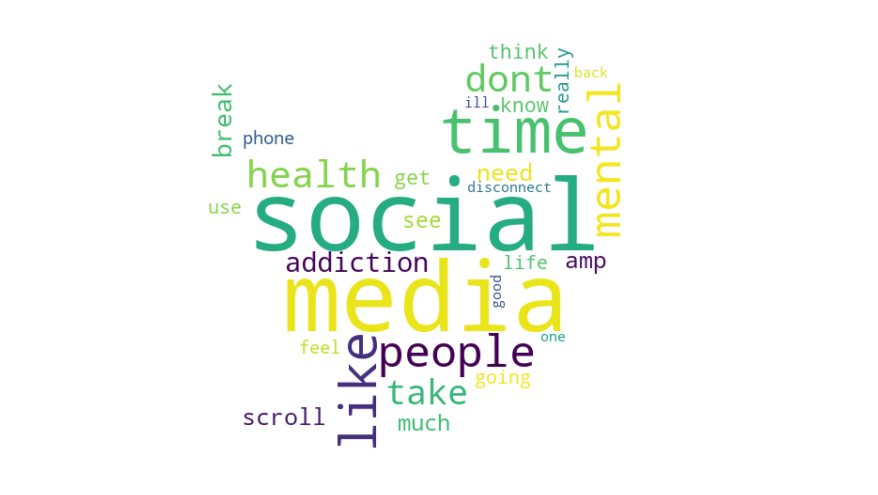

In [66]:
from wordcloud import WordCloud

# create word cloud of top 30 words
wordcloud = WordCloud(background_color = 'white', mask=transformed_mask).generate_from_frequencies(top_30_dictionary)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

Looking at this, it is safe to say that people talk a lot about health and time in this dataset.


# Data Analysis: Network Graph

The following approach is the network graph. This approach creates a connection between a large set of bigrams. We used network graphs to understand the relationship between words.

In [68]:
# create dictionary of bigrams and their counts
d = terms_bigram.set_index('index').T.to_dict('records')

In [69]:
# sources for implementing network graphs
# https://github.com/Jcharis/Social-Network-Analysis/blob/master/Python%20NetworkX%20%20Tutorial/Social%20Network%20Analysis%20with%20Networkx%20in%20Python%20-%20All%20In%20One.ipynb
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
# https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9

import networkx as nx
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# create network plot 
G = nx.Graph()

# create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v))

In [71]:
from pyvis.network import Network
from pyvis import network as net

nt = Network('1000px', '1000px', bgcolor='white', font_color='black')
nt = net.Network(notebook=True)
# nt.show_buttons(filter_=['physics'])

# populates the nodes and edges data structures
nt.from_nx(G)
nt.show('example.html')

We can see that the three words with the most connections are (social, media, and time). Since the term social media is used in most of our search terms, there is no doubt that it will have the most connections. However, having the word “time” with this many bonds indicates that many Twitter users use time-related associations when talking about a social media break.


# Data Analysis: Sentiment Analysis

Our last approach is sentiment analysis.
Sentiment analysis is a natural language processing technique that helps determine the sentence polarity—meaning (positive, negative, or neutral). We used sentiment analysis to develop a holistic view of the polarity of the tweets.
We used a model that is trained on product reviews. The model predicts the sentiment of the review as a number of stars between 1 and 5.


In [72]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

In [73]:
# https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [74]:
import emoji

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) 
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) 
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI)
    tweet = tweet.replace("#", "").replace("_", " ")
    return tweet

In [78]:
tweets = tweets.map(lambda x: cleaner(x))

In [80]:
# convert to data frame to add the sentement value
df = tweets.to_frame("text")

In [81]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [83]:
df['sentiment'] = df['text'].apply(lambda x: sentiment_score(x))

In [84]:
df.head()

,text,sentiment
0,"Unplugging yourself from social media is very healthy. Run, run far away, and don't look back. Trust me, there's a life outside of social media. I've seen it.",5
1,"Social Media Detox Step 14: Take a few moments to reflect on what you gained from unplugging from social media for a few days, and analyze what habits you’d like to change.",4
2,"I can’t ingest social media like I used to, I find myself constantly unplugging because lately it’s been super heavy. seems like it’s always bad news",2
3,"I'm sure we're all guilty of succumbing to too much social media esp during lockdown life. IMO, a digi detox is beneficial || ""Q3 : Have social media &amp; digital technologies become our social pastime? should we be more intentional in our use of digital technologies?""MHChat",1
4,"87 I guess too much of twitter(social media). Please take a break(digital detox) it would truly restore you back ma'am. Social media makes people more lonely even if you have your loved ones around, even sitting beside you.",1


In [85]:
sentiment_graph = df['sentiment'].value_counts().to_frame().reset_index()
sentiment_graph.columns = ['rating', 'tweet-count']
sentiment_graph

,rating,tweet-count
0,1,196
1,2,101
2,5,80
3,4,67
4,3,56


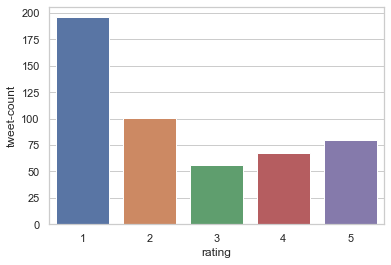

In [86]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='rating', y='tweet-count', data=sentiment_graph)

Plotting the star values for the 500 tweets, we can see that the negative tweets; indicated by one star are the most common. Meaning that in this context, people usually phrase their relationship with social media in negative terms.

# Conclusion

Most of the tweets indicate that taking some time off social media is a good thing.
Twitter users are most concerned about their time and health when they are discussing their time away from social media.
Terms such as "unplugging, disconnection, fast" are not frequently used in the context of taking a break.
Most people use the terms "break and time off," which indicate a quick action and plan to come back from social media.
Twitter uses use generic language when they're discussing their connection. For example, they say it's bad for mental health but rarely mention how their social media time makes them feel.
